#### Bài 1

##### 1.1 txt

In [2]:
# Tạo file 
f = open('test.txt','w')
f.close()

In [3]:
# Đọc file 
with open('test.txt', "r") as file :
    for line in file :
        print(line.strip())

In [4]:
# Ghi vào file
with open('test.txt', "a") as file :
    file.write('\n')
    file.write('Practice 3')
    file.write('\n')
    file.write('Happy new year')
    file.write('\n')
    file.write('IUH')
    file.close()

# Check 
with open('test.txt', "r") as file :
    for line in file :
        print(line.strip())


Practice 3
Happy new year
IUH


##### 1.2 Log

In [5]:
# Tạo file 
f = open('test.log','w')

In [6]:
# Đọc nội dung 
with open('test.log','r') as f_log :
    for line in f_log :
        print(line.strip())
    

In [7]:
# Ghi vào file
with open('test.log', "a") as file :
    file.write('\n')
    file.write('Practice 3')
    file.write('\n')
    file.write('Happy new year')
    file.write('\n')
    file.write('IUH')
    file.close()

# Check 
with open('test.log', "r") as file :
    for line in file :
        print(line.strip())


Practice 3
Happy new year
IUH


##### 1.3 config

In [8]:
# Tạo file 
f = open('test.config','w')
f.close()

#### Bài 2


In [1]:
def data_process(data):
    data = data.split(' | ')
    data[-1] = data[-1][:-1]
    data_valid = []
    try :
        data_valid.append(data[0])
        data_valid.append(data[1])
        data_valid.append(int(data[2]))
        check_seat = 1/(data_valid[-1]> 0)
        data_valid.append(int(data[3]))
        check_booked = 1/(data_valid[-1] >= 0 and data_valid[-1] <= data_valid[-2]) 
        data_valid.append(float(data[4]))
        check_depart_time = 1/(data_valid[-1] >= 0)
        data_valid.append(data[5])
        return data_valid
    except:
        print("Dữ liệu không hợp lệ")

In [2]:
class Train :
    def __init__(self, data) :
        self.tcode = data[0]
        self.train_name = data[1]
        self.seat = data[2]
        self.booked = int(data[3]) 
        self.depart_time = data[4]
        self.depart_place = data[5]

In [3]:
class Node :
    def __init__(self, data : Train) -> None:
        self.data = data 
        self.next = None
class Traines :
    def __init__(self) -> None:
        self.head = None
        self.tail = None

    def check_trung(self, code) :
        current_node = self.head
        while current_node :
            if current_node.data.tcode == code :
                return True
            current_node = current_node.next
        return False
    # 1.1 Thêm vào một node có giá trị e1 vào cuối danh sách liên kết 
    def add_node_tail(self, data) : 
        new_node = Node(data)
        if not self.head :
            self.head = new_node
            self.tail = new_node
            return
        self.tail.next = new_node
        self.tail = new_node

    # 1.2 Thêm vào một node có giá trị e1 vào đầu danh sách liên kết 
    def add_node_head(self, data):
        new_node = Node(data)
        if not self.head :
            self.head = new_node
            self.tail = new_node
            return
        p = self.head 
        new_node.next = p
        self.head = new_node

    # 1.3 Thêm vào một node có giá trị e1 vào vị trí pos trong danh sách
    def add_train_after_others(self , data, pos) :
        new_node = Node(data)
        if pos == 1 : 
            self.add_node_head(data)
            return
        current_node = self.head
        for _ in range (pos-2) :
            if current_node is None :
                print("Invalid position")
                return 
            current_node = current_node.next 
        new_node.next = current_node.next
        current_node.next = new_node
    
    # 1.5 Xóa phần tử ở đầu danh sách 
    def del_node_head(self):
        if not self.head :
            return 
        temp = self.head
        self.head = self.head.next
        if self.tail is temp :
            self.tail = None
        del temp
    
    # 1.6 Xóa phần tử ở cuối danh sách
    def remove_train_tail(self) : 
        if not self.tail :
            return 
        current_node = self.head
        while current_node.next != self.tail :
            current_node = current_node.next
        temp = self.tail
        self.tail = current_node
        current_node.next = None
        del temp

    def find_idx_train(self, code) :
        flag = -1
        idx = 1
        current_train = self.head 
        while current_train :
            if current_train.data.tcode == code :
                flag = idx
                break
            idx += 1
            current_train = current_train.next
        return flag
    
    def find_info_train(self, pos):
        if pos == 1 :
            return self.head.data
        current_node = self.head
        for _ in range(pos-1) :
            if current_node is None :
                print("Invalid position")
                return
            current_node = current_node.next
        return current_node.data


    def remove_train(self, tcode):
        current_train = self.head 
        if current_train.data.tcode == tcode :
            self.del_node_head()
        flag = False
        while current_train.next :
            next_train = current_train.next.data
            if next_train.tcode == tcode :
                flag = True
                break
            current_train = current_train.next
        if flag is False:
            print("Không tồn tại tàu có mã ", tcode)
        else :
            if current_train.next is self.tail :
                self.remove_train_tail()
                return
            rm_train = current_train.next
            current_train.next = rm_train.next
            del rm_train

    def sort_on_tcode(self) :
        if not self.head :
            return 
        swapped = True
        sorted_train = None
        while swapped:
            swapped = False
            current_train = self.head
            while current_train.next != sorted_train:
                if current_train.data.tcode > current_train.next.data.tcode:
                    current_train.data, current_train.next.data = current_train.next.data, current_train.data
                    swapped = True
                current_train = current_train.next
            sorted_train = current_train

    def update_info_train(self, tcode, data) :
        current_train = self.head
        flag = False
        while current_train :
            if current_train.data.tcode == tcode :
                flag = True 
                break
            current_train = current_train.next
        if flag :
            current_train.data = data
        else :
            print("Không tồn tại mã tàu ", tcode)

    def remove_before_node(self, xCode) :
        current_train = self.head 

        if current_train.data.tcode == xCode :
            return 
        
        while current_train.next  :
            temp = current_train.next.data
            if temp.tcode == xCode :
                break
            current_train = current_train.next
        if current_train.next :
            self.remove_train(current_train.data.tcode)

    def save_to_file(self, filename) :
        current_node = self.head 
        with open(filename, 'w') as file :
            while current_node :
                temp = current_node.data
                dt = temp.tcode + ' | ' + temp.train_name + ' | ' + str(temp.seat) + ' | ' + str(temp.booked) + ' | ' + str(temp.depart_time) + ' | ' + temp.depart_place
                file.write(dt)
                file.write('\n')
                current_node = current_node.next
    
    # 1.10 In ra danh sách 
    def display(self) :
        print("Danh Sách")
        current_node = self.head
        while current_node :
            temp = current_node.data
            print(temp.tcode, temp.train_name, temp.seat , temp.booked, temp.depart_time, temp.depart_place)
            current_node = current_node.next
        print()


In [9]:
# In thông tin một tàu
def displayTrain(train_info) :
    print("Tcode : " + train_info.tcode)
    print("Train_name : " + train_info.train_name )
    print("Seat : " + str(train_info.seat) )
    print("Booked : " + str(train_info.booked))
    print("Dapart_time : " + str(train_info.depart_time))
    print("Depart_place : " + train_info.depart_place)

In [5]:
list_train = Traines()

with open('input.txt', 'r') as file :
    for line in file :
        dt = Train(data_process(line))
        if (list_train.check_trung(dt.tcode)):
            print("Đã tồn tại tàu có mã ", dt.tcode)
        else :
            list_train.add_node_tail(dt)
    file.close()

In [6]:
# In ra danh sách tàu
list_train.display()


Danh Sách
B03 Sug 12 3 11.0 PA
B01 Mil 10 5 5.7 PC
B02 App 5 2 4.0 PB
B05 Roo 7 6 15.0 PE
B07 Bee 11 3 12.0 P



In [7]:
# Luu du lieu vao file 
list_train.save_to_file('data.txt')

In [10]:
# Tìm kiếm dữ liệu theo tcode 
id = list_train.find_idx_train(input("Nhập tcode của tàu cần tìm : "))
if id != -1 :
    print("Thông tin của tàu cần tìm")
    train_info = list_train.find_info_train(id)
    displayTrain(train_info)
else :
    print("Không tồn tại tàu có mã code này")

Thông tin của tàu cần tìm
Tcode : B03
Train_name : Sug
Seat : 12
Booked : 3
Dapart_time : 11.0
Depart_place : PA


In [11]:
# Xóa dữ liệu theo code 
list_train.remove_train('B07')
list_train.display()

Danh Sách
B03 Sug 12 3 11.0 PA
B01 Mil 10 5 5.7 PC
B02 App 5 2 4.0 PB
B05 Roo 7 6 15.0 PE



In [12]:
# Sắp xếp theo tcode 
list_train.sort_on_tcode()
list_train.display()

Danh Sách
B01 Mil 10 5 5.7 PC
B02 App 5 2 4.0 PB
B03 Sug 12 3 11.0 PA
B05 Roo 7 6 15.0 PE



In [13]:
# Thêm một dữ liệu sau vị trí K
data_add = Train(['B04', 'Tdh', 26,21,10,'NT'])
list_train.add_train_after_others(data_add,int(input("Nhập vị trí cần thêm dữ liệu : "))+1)
list_train.display()

Danh Sách
B01 Mil 10 5 5.7 PC
B02 App 5 2 4.0 PB
B03 Sug 12 3 11.0 PA
B04 Tdh 26 21 10 NT
B05 Roo 7 6 15.0 PE



In [14]:
# Sửa dữ liệu theo tcode 
list_train.update_info_train('B04', Train(['B04', 'Hoan',26,21,10,'TPHCM']))
list_train.display()

Danh Sách
B01 Mil 10 5 5.7 PC
B02 App 5 2 4.0 PB
B03 Sug 12 3 11.0 PA
B04 Hoan 26 21 10 TPHCM
B05 Roo 7 6 15.0 PE



In [15]:
# Xóa 1 node trước node có tcode = xcode 
list_train.remove_before_node(input('Nhập xCode : '))
list_train.display()

Danh Sách
B01 Mil 10 5 5.7 PC
B02 App 5 2 4.0 PB
B04 Hoan 26 21 10 TPHCM
B05 Roo 7 6 15.0 PE



#### Bài 3

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

- 3.1

In [17]:
car_data = pd.read_csv('car.csv')
car_data

,car_model,km,car_type,out_color,in_color,seat_num,door_num,price,new_old,car_year,price.1,area
0,acura-mdx,0,SUV,Đen,Đen,7,5,630,Xe cũ,2007,630,TP HCM
1,acura-mdx,0,SUV,Bạc,Đen,7,5,580,Xe cũ,2007,580,Hà Nội
2,acura-mdx,0,SUV,Bạc,Nhiều màu,7,5,465,Xe cũ,2006,465,TP HCM
3,acura-mdx,0,SUV,Đen,Kem,7,5,4665,Xe mới,2016,4665,TP HCM
4,acura-mdx,9600,SUV,Trắng,Cát,7,5,3400,Xe cũ,2015,3400,TP HCM
...,...,...,...,...,...,...,...,...,...,...,...,...
39167,hang_khac,0,Truck,Trắng,Màu khác,2,2,1515,Xe cũ,2015,1515,Bình Dương
39168,hang_khac,0,Truck,Xanh,Màu khác,3,2,105,Xe cũ,2011,105,Đăk Nông
39169,hang_khac,25000,Van/Minivan,Đen,Xanh,29,1,1150,Xe cũ,2017,1150,Hà Nội
39170,hang_khac,0,Truck,Xanh,Màu khác,3,2,80,Xe cũ,2008,80,Gia Lai


- 3.2

In [18]:
car_data.isnull().sum()

car_model    0
km           0
car_type     0
out_color    0
in_color     0
seat_num     0
door_num     0
price        0
new_old      0
car_year     0
price.1      0
area         0
dtype: int64

- 3.3

In [19]:
print("\nThông tin về dữ liệu Số lượng xe của mỗi loại:")
print(car_data['car_type'].value_counts())


Thông tin về dữ liệu Số lượng xe của mỗi loại:
car_type
Sedan                    13488
SUV                      10633
Hatchback                 5360
Crossover                 3004
Van/Minivan               2388
Bán tải / Pickup        2325
Truck                     1671
Coupe                      188
Convertible/Cabriolet       99
Wagon                       16
Name: count, dtype: int64


- 3.4

In [20]:
car_new_old = car_data.groupby(['car_type','new_old']).size()
car_new_old

car_type               new_old
Bán tải / Pickup     Xe cũ       1315
                       Xe mới      1010
Convertible/Cabriolet  Xe cũ         65
                       Xe mới        34
Coupe                  Xe cũ        157
                       Xe mới        31
Crossover              Xe cũ       2144
                       Xe mới       860
Hatchback              Xe cũ       4159
                       Xe mới      1201
SUV                    Xe cũ       6223
                       Xe mới      4410
Sedan                  Xe cũ      10335
                       Xe mới      3153
Truck                  Xe cũ       1150
                       Xe mới       521
Van/Minivan            Xe cũ       1888
                       Xe mới       500
Wagon                  Xe cũ         16
dtype: int64

- 3.5

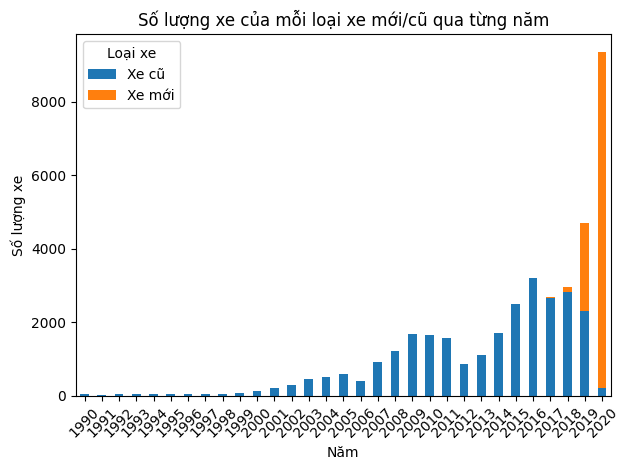

In [21]:
car_new_old_year = car_data.groupby(['car_year','new_old']).size().unstack()
car_new_old_year.plot(kind = 'bar', stacked = True)
plt.xlabel('Năm')
plt.ylabel('Số lượng xe')
plt.title('Số lượng xe của mỗi loại xe mới/cũ qua từng năm')
plt.legend(title='Loại xe')
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

- 3.6

In [22]:
filter_data = car_data[car_data['area'].isin(['TP HCM', 'Hà Nội', 'Đà Nẵng'])]

filter_data.to_csv(
    'new_data.csv', index=False
)

# check 
new_car_data = pd.read_csv('new_data.csv')
new_car_data.head()

,car_model,km,car_type,out_color,in_color,seat_num,door_num,price,new_old,car_year,price.1,area
0,acura-mdx,0,SUV,Đen,Đen,7,5,630,Xe cũ,2007,630,TP HCM
1,acura-mdx,0,SUV,Bạc,Đen,7,5,580,Xe cũ,2007,580,Hà Nội
2,acura-mdx,0,SUV,Bạc,Nhiều màu,7,5,465,Xe cũ,2006,465,TP HCM
3,acura-mdx,0,SUV,Đen,Kem,7,5,4665,Xe mới,2016,4665,TP HCM
4,acura-mdx,9600,SUV,Trắng,Cát,7,5,3400,Xe cũ,2015,3400,TP HCM


- 3.7

In [23]:
new_car_data = pd.read_csv('new_data.csv')
df = pd.DataFrame({
    'Trung bình' : new_car_data.groupby('area')['price.1'].mean(),
    'Trung vị' : new_car_data.groupby('area')['price.1'].median(),
    'Độ lệch chuẩn' : new_car_data.groupby('area')['price.1'].std()
})

df

,Trung bình,Trung vị,Độ lệch chuẩn
area,,,
Hà Nội,1169.878810,555.0,2383.923014
TP HCM,974.157676,629.0,1465.854033
Đà Nẵng,608.155612,450.0,636.168449


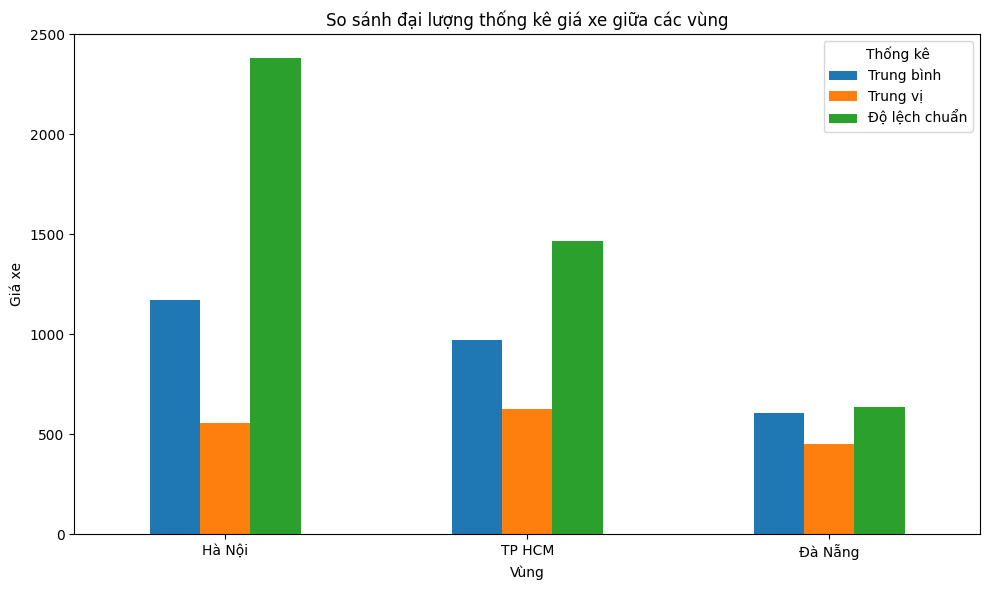

In [24]:
df.plot(kind = 'bar', figsize=(10,6))
plt.title('So sánh đại lượng thống kê giá xe giữa các vùng')
plt.xlabel('Vùng')
plt.ylabel('Giá xe')
plt.xticks(rotation=0)
plt.legend(title='Thống kê')
plt.tight_layout()
plt.show()

- 3.8

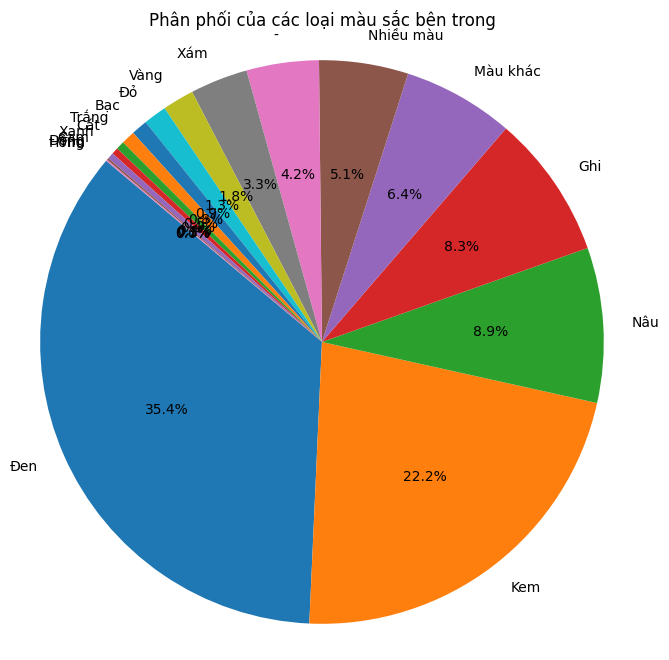

In [25]:
color_distribution = new_car_data['in_color'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(color_distribution, labels=color_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối của các loại màu sắc bên trong')
plt.axis('equal')
plt.show()

+ Qua biểu đồ trên , ta thấy được màu đen là màu phổ biến nhất trong các dòng xe, các màu sắc còn lại phân bố khá đồng đều

- 3.9

In [26]:
old_car = new_car_data[new_car_data['new_old'] == 'Xe cũ']

old_car

,car_model,km,car_type,out_color,in_color,seat_num,door_num,price,new_old,car_year,price.1,area
0,acura-mdx,0,SUV,Đen,Đen,7,5,630,Xe cũ,2007,630,TP HCM
1,acura-mdx,0,SUV,Bạc,Đen,7,5,580,Xe cũ,2007,580,Hà Nội
2,acura-mdx,0,SUV,Bạc,Nhiều màu,7,5,465,Xe cũ,2006,465,TP HCM
4,acura-mdx,9600,SUV,Trắng,Cát,7,5,3400,Xe cũ,2015,3400,TP HCM
5,acura-mdx,9700,SUV,Trắng,Kem,7,5,3450,Xe cũ,2015,3450,TP HCM
...,...,...,...,...,...,...,...,...,...,...,...,...
24788,hang_khac,0,Truck,Xanh,Màu khác,2,2,75,Xe cũ,2015,75,Đà Nẵng
24789,hang_khac,100000,Truck,Xanh,Đen,2,2,120,Xe cũ,2010,120,TP HCM
24790,hang_khac,0,Truck,Xanh,Màu khác,3,2,90,Xe cũ,2008,90,Hà Nội
24791,hang_khac,0,Truck,Trắng,Ghi,2,2,499,Xe cũ,2014,499,Đà Nẵng


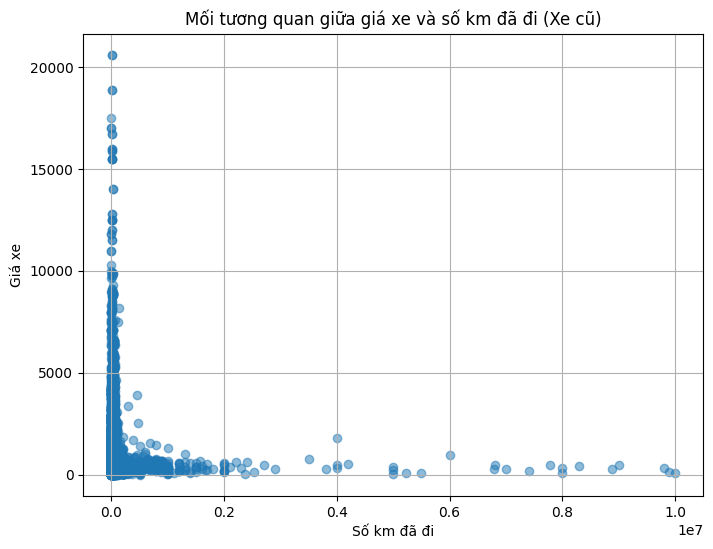

In [27]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(old_car['km'], old_car['price.1'], alpha=0.5)
plt.title('Mối tương quan giữa giá xe và số km đã đi (Xe cũ)')
plt.xlabel('Số km đã đi')
plt.ylabel('Giá xe')
plt.grid(True)
plt.show()

In [28]:
# Tính hệ số tương quan
correlation_coefficient = old_car['km'].corr(old_car['price.1'])
print("Hệ số tương quan giữa giá xe và số km đã đi:", correlation_coefficient)

Hệ số tương quan giữa giá xe và số km đã đi: -0.04835540498470059


- 3.10

In [29]:
car_data

,car_model,km,car_type,out_color,in_color,seat_num,door_num,price,new_old,car_year,price.1,area
0,acura-mdx,0,SUV,Đen,Đen,7,5,630,Xe cũ,2007,630,TP HCM
1,acura-mdx,0,SUV,Bạc,Đen,7,5,580,Xe cũ,2007,580,Hà Nội
2,acura-mdx,0,SUV,Bạc,Nhiều màu,7,5,465,Xe cũ,2006,465,TP HCM
3,acura-mdx,0,SUV,Đen,Kem,7,5,4665,Xe mới,2016,4665,TP HCM
4,acura-mdx,9600,SUV,Trắng,Cát,7,5,3400,Xe cũ,2015,3400,TP HCM
...,...,...,...,...,...,...,...,...,...,...,...,...
39167,hang_khac,0,Truck,Trắng,Màu khác,2,2,1515,Xe cũ,2015,1515,Bình Dương
39168,hang_khac,0,Truck,Xanh,Màu khác,3,2,105,Xe cũ,2011,105,Đăk Nông
39169,hang_khac,25000,Van/Minivan,Đen,Xanh,29,1,1150,Xe cũ,2017,1150,Hà Nội
39170,hang_khac,0,Truck,Xanh,Màu khác,3,2,80,Xe cũ,2008,80,Gia Lai


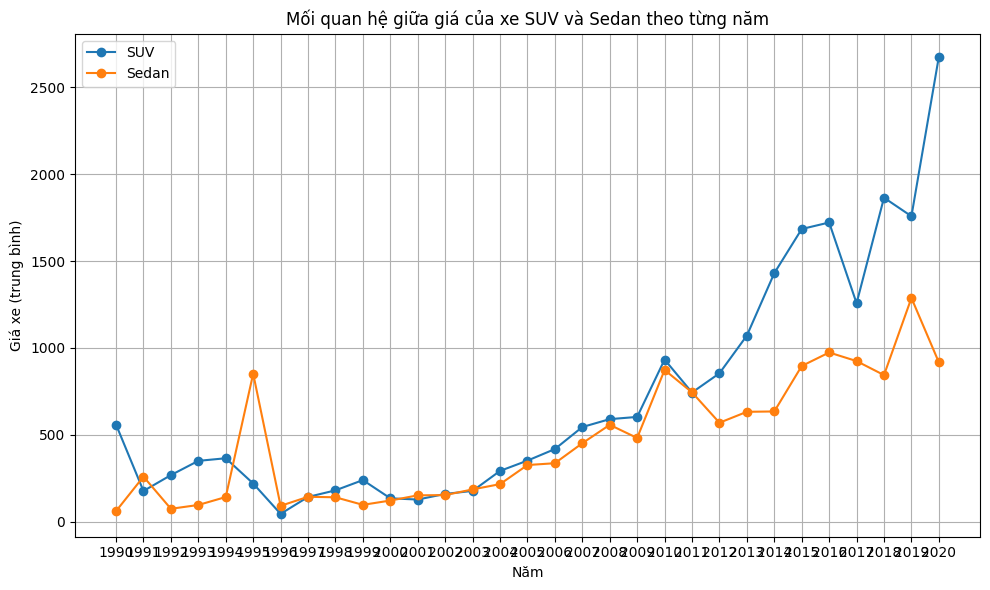

In [30]:
suv_data = new_car_data[new_car_data['car_type'] == 'SUV']
sedan_data = new_car_data[new_car_data['car_type'] == 'Sedan']

suv_prices_by_year = suv_data.groupby('car_year')['price.1'].mean()
sedan_prices_by_year = sedan_data.groupby('car_year')['price.1'].mean()

plt.figure(figsize=(10, 6))
plt.plot(suv_prices_by_year.index, suv_prices_by_year.values, marker='o', label='SUV')
plt.plot(sedan_prices_by_year.index, sedan_prices_by_year.values, marker='o', label='Sedan')
plt.title('Mối quan hệ giữa giá của xe SUV và Sedan theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Giá xe (trung bình)')
plt.legend()
plt.grid(True)
plt.xticks(suv_prices_by_year.index)
plt.tight_layout()
plt.show()

Nhận xét:

Từ biểu đồ, ta có thể thấy được hai loại xe SUV và Sedan tăng dần qua mỗi năm.
Từ đó, ta có thể kết luận rằng thị trường đang có sự ưa thích đối với 2 loại xe này